In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.ndvi import get_yard_data, calculate_ndvi, process_image

import warnings
warnings.filterwarnings("ignore")
cmap = 'PiYG'

## Example of processing a single image

In [2]:
# Add file location of the rgb/cir aerial images
input_aerial_rgb = 'data/2023_breda_rgb_small.tif'
input_aerial_cir = 'data/2023_breda_cir_small.tif'

# load the images
aeriel_rgb = rasterio.open(input_aerial_rgb)
aeriel_cir = rasterio.open(input_aerial_cir)

# Obtain the bounds of the image 
bounds = tuple(aeriel_cir.bounds)

# Obtain the yard data given the image bounds
yard_data = get_yard_data(bounds)

# Process the aerial images according to the yard data
result_dataset = process_image(yard_data, aeriel_rgb, aeriel_cir)

Status: PENDING. Waiting...
Download ready: /kadaster/kadastralekaart/download/v5_0/extract/b5438d94-a664-4179-be9b-220b6cbe5b82/extract.zip
Downloaded file saved to kadaaster_data.zip
Extracted files to kadaaster_data


In [3]:
# show the resulting dataset
result_dataset.head()

erf_id  \
NL.IMKAD.KadastraalObject.6950506470000  f64f4eda-4f43-5cc1-9895-6e6a2d8f5498   
NL.IMKAD.KadastraalObject.6950588770000  a4499a82-02d2-549d-9ab6-f3615d5e9a84   
NL.IMKAD.KadastraalObject.6950384070000  d06d11ce-8273-5316-b061-4df939fe20f7   
NL.IMKAD.KadastraalObject.6950534970000  9868b040-09b9-595f-88d2-8bf5c5a02561   
NL.IMKAD.KadastraalObject.6950574770000  f64f4eda-4f43-5cc1-9895-6e6a2d8f5498   

                                                                               clipped_cir  \
NL.IMKAD.KadastraalObject.6950506470000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950588770000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950384070000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950534970000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950574770000  [[[--, --, --, --, --, --, --, --, --, --, --,...   

                                                                               clipped_rgb  \
NL.IMKAD.KadastraalObject.6950506470000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950588770000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950384070000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950534970000  [[[--, --, --, --, --, --, --, --, --, --, --,...   
NL.IMKAD.KadastraalObject.6950574770000  [[[--, --, --, --, --, --, --, --, --, --, --,...   

                                                                          affine_transform  \
NL.IMKAD.KadastraalObject.6950506470000  (0.25, 0.0, 114174.25, 0.0, -0.25, 395467.0, 0...   
NL.IMKAD.KadastraalObject.6950588770000  (0.25, 0.0, 113989.0, 0.0, -0.25, 395413.0, 0....   
NL.IMKAD.KadastraalObject.6950384070000  (0.25, 0.0, 114199.75, 0.0, -0.25, 395599.5, 0...   
NL.IMKAD.KadastraalObject.6950534970000  (0.25, 0.0, 114075.5, 0.0, -0.25, 395369.0, 0....   
NL.IMKAD.KadastraalObject.6950574770000  (0.25, 0.0, 114146.0, 0.0, -0.25, 395412.25, 0...   

                                                                                      ndvi  \
NL.IMKAD.KadastraalObject.6950506470000  [[--, --, --, --, --, --, --, --, --, --, --, ...   
NL.IMKAD.KadastraalObject.6950588770000  [[--, --, --, --, --, --, --, --, --, --, --, ...   
NL.IMKAD.KadastraalObject.6950384070000  [[--, --, --, --, --, --, --, --, --, --, --, ...   
NL.IMKAD.KadastraalObject.6950534970000  [[--, --, --, --, --, --, --, --, --, --, --, ...   
NL.IMKAD.KadastraalObject.6950574770000  [[--, --, --, --, --, --, --, --, --, --, --, ...   

                                         ndvi_mean  
NL.IMKAD.KadastraalObject.6950506470000   0.191412  
NL.IMKAD.KadastraalObject.6950588770000   0.191424  
NL.IMKAD.KadastraalObject.6950384070000   0.025736  
NL.IMKAD.KadastraalObject.6950534970000   0.181363  
NL.IMKAD.KadastraalObject.6950574770000   0.167690

## Processing multiple images at once

In [4]:
### Load data and process the images 
years = [2020, 2022, 2023]
result_dataset = []
for count, year in enumerate(years):
    # load the aerial images and get the geo bounds
    input_aerial_rgb = f'data/{year}_breda_rgb_small.tif'
    input_aerial_cir = f'data/{year}_breda_cir_small.tif'
    aeriel_rgb = rasterio.open(input_aerial_rgb)
    aeriel_cir = rasterio.open(input_aerial_cir)
    if count > 0:
        assert aeriel_cir.bounds == bounds, "The bounds of the images are not the same over the years"
    bounds = tuple(aeriel_cir.bounds)
    if count == 0:
        yard_data = get_yard_data(bounds)
    result_dataset.append(process_image(yard_data, aeriel_rgb, aeriel_cir))

Status: PENDING. Waiting...
Download ready: /kadaster/kadastralekaart/download/v5_0/extract/8ee3cbd9-569f-4785-befc-737df8ec2996/extract.zip
Downloaded file saved to kadaaster_data.zip
Extracted files to kadaaster_data


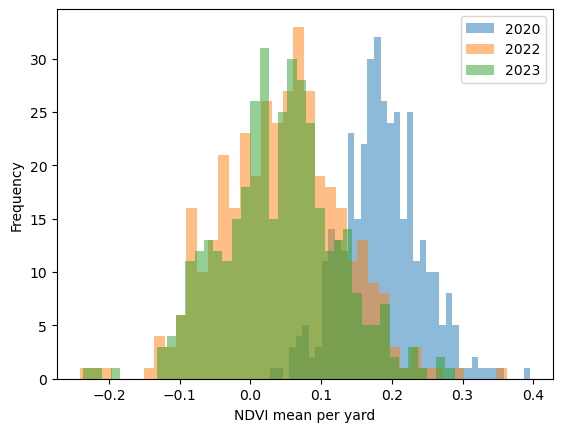

In [6]:
# make a ndvi histogram
for count, df in enumerate(result_dataset):
    plt.hist(df['ndvi_mean'], bins=40, alpha=0.5, label=years[count])
    plt.xlabel('NDVI mean per yard')
    plt.ylabel('Frequency')
plt.legend()

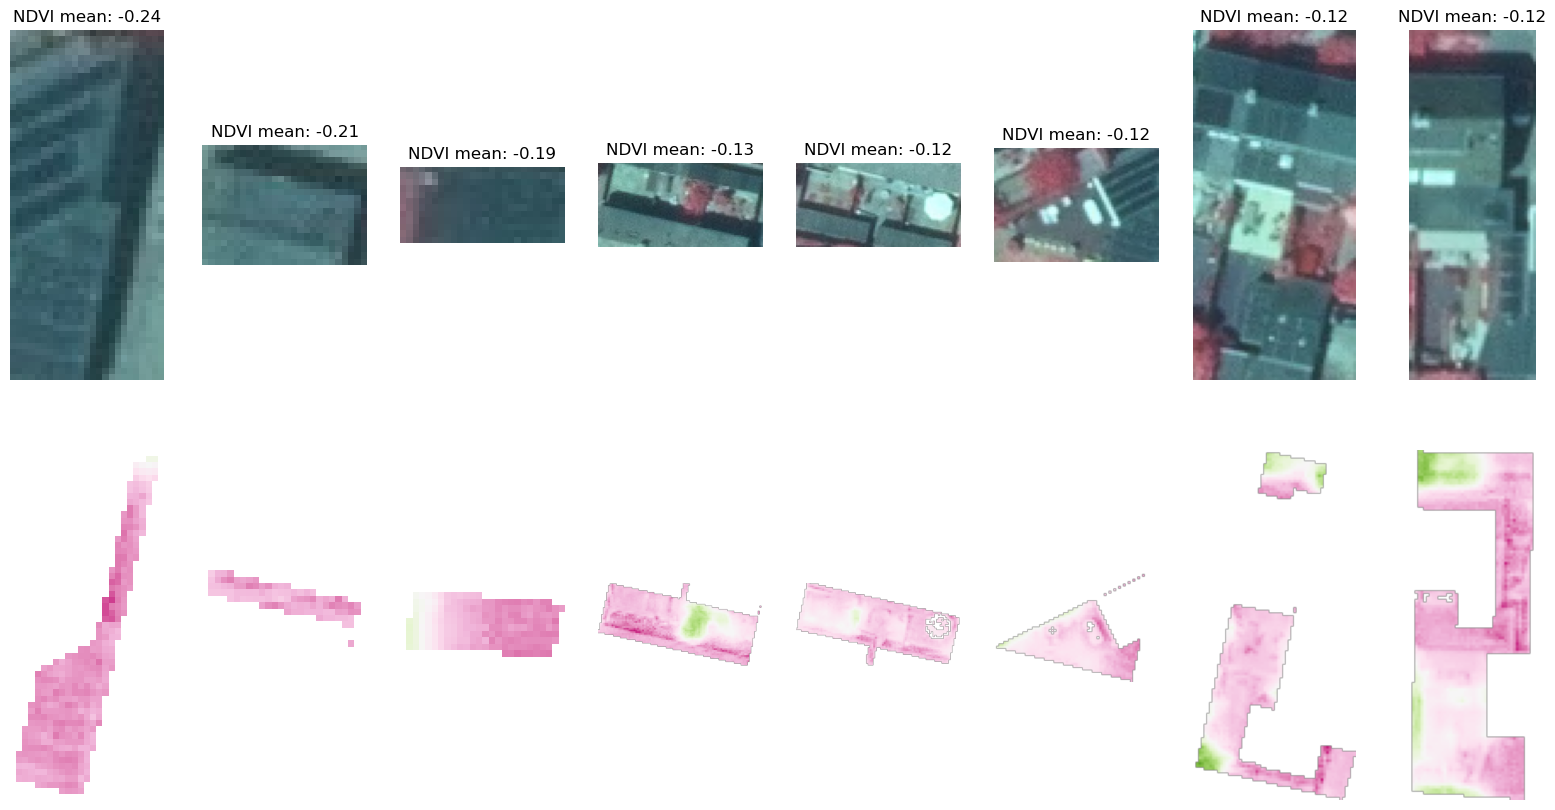

In [7]:
# plot top 8 plots with lowest NDVI mean and directly below that plot the correspondig NDVI map
top5 = df.sort_values(by='ndvi_mean').head(8)
fig, ax = plt.subplots(2, 8, figsize=(20, 10))
for i, (_, row) in enumerate(top5.iterrows()):
    ax[0, i].imshow(row['clipped_cir'].transpose((1, 2, 0)))
    ax[0, i].set_title(f"NDVI mean: {row['ndvi_mean']:.2f}")
    ax[0, i].axis('off')
    ax[1, i].imshow(row['ndvi'], cmap=cmap, vmin=-0.5, vmax=0.5)
    ax[1, i].axis('off')
plt.show()

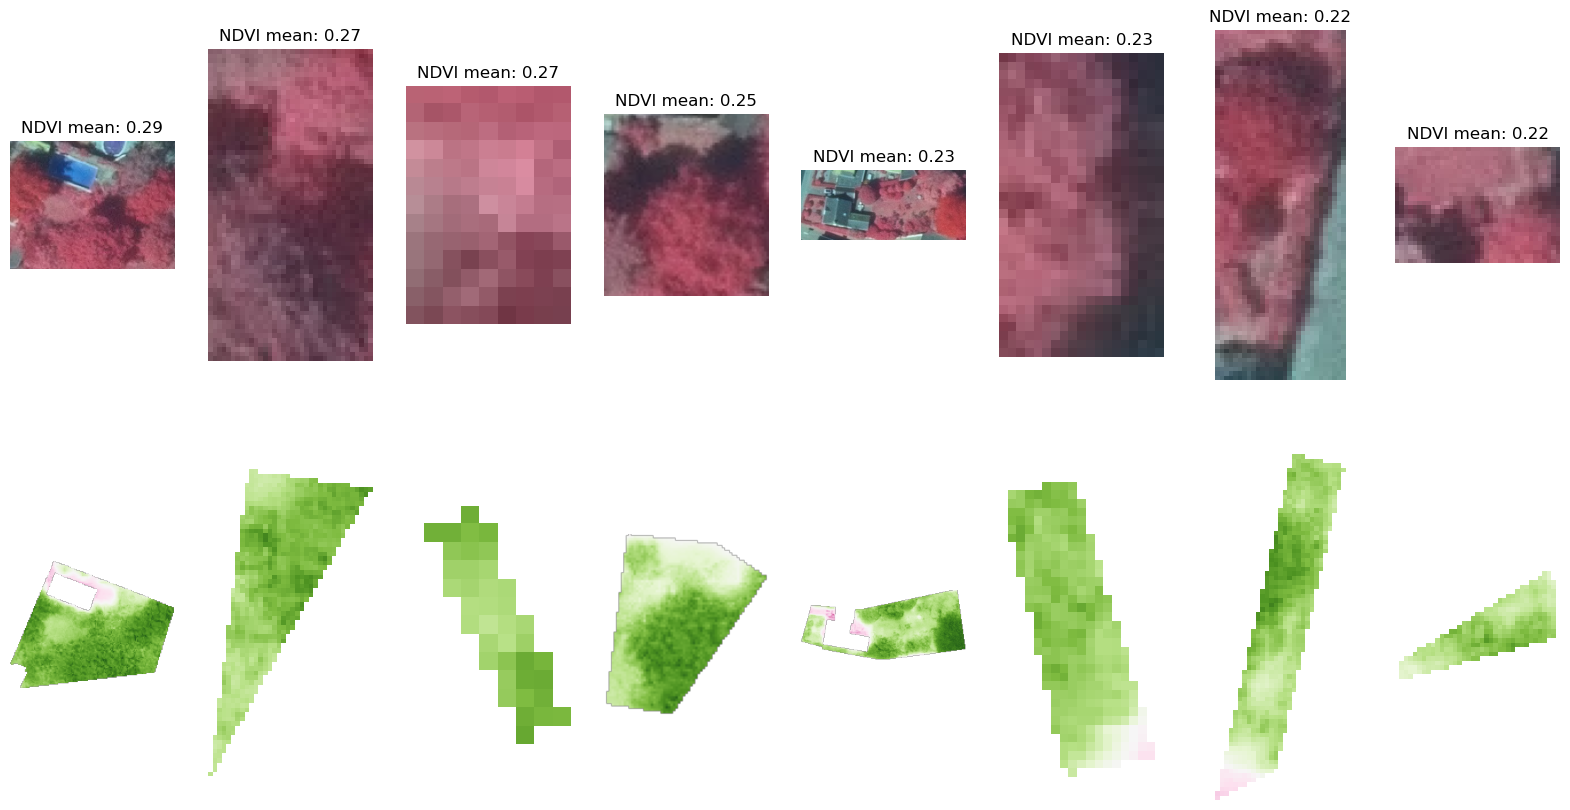

In [8]:
# plot top 5 plots with highest NDVI mean and directly below that plot the correspondig NDVI map
top5 = df.nlargest(8, 'ndvi_mean')
fig, ax = plt.subplots(2, 8, figsize=(20, 10))
for i, (_, row) in enumerate(top5.iterrows()):
    ax[0, i].imshow(row['clipped_cir'].transpose((1, 2, 0)))
    ax[0, i].set_title(f"NDVI mean: {row['ndvi_mean']:.2f}")
    ax[0, i].axis('off')
    ax[1, i].imshow(row['ndvi'], cmap=cmap, vmin=-0.5, vmax=0.5)
    ax[1, i].axis('off')
plt.show()

NL.IMKAD.KadastraalObject.6950416770000


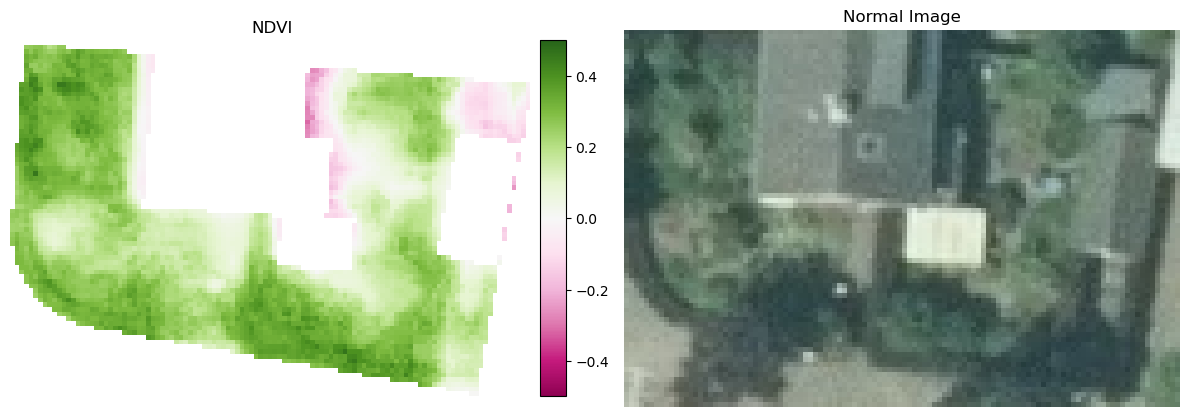

NL.IMKAD.KadastraalObject.6950432370000


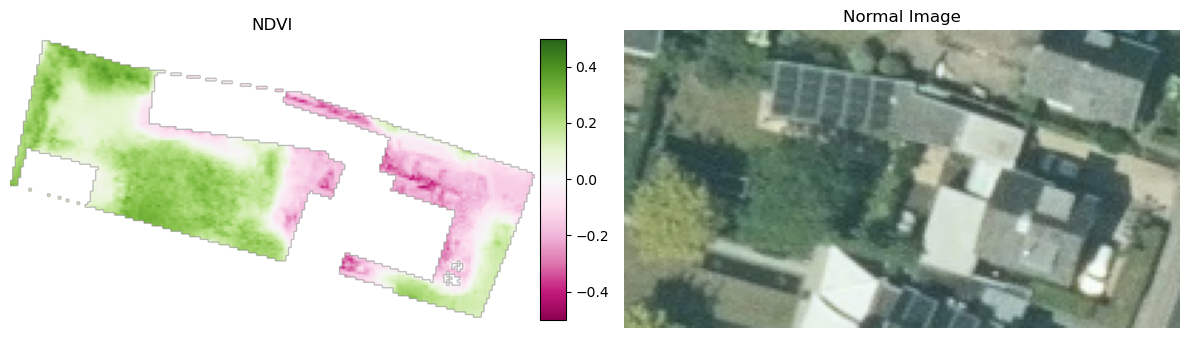

NL.IMKAD.KadastraalObject.6950574770000


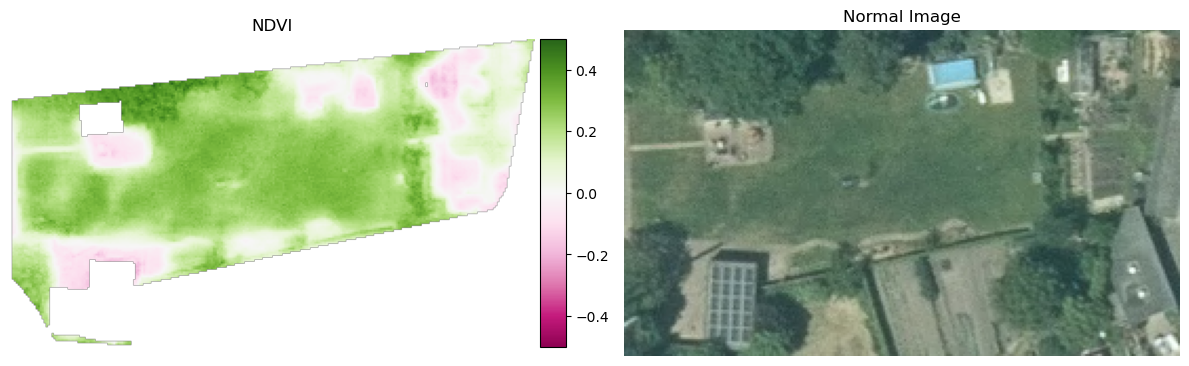

NL.IMKAD.KadastraalObject.6950575970000


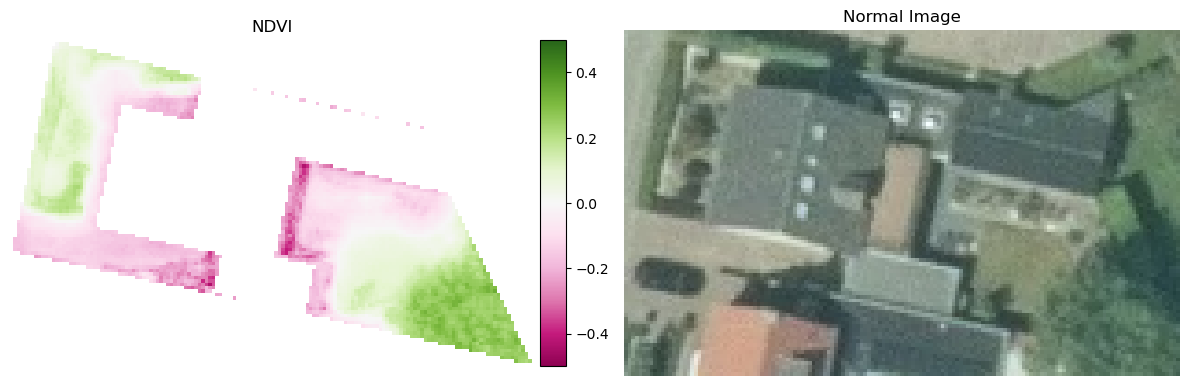

NL.IMKAD.KadastraalObject.6950417370000


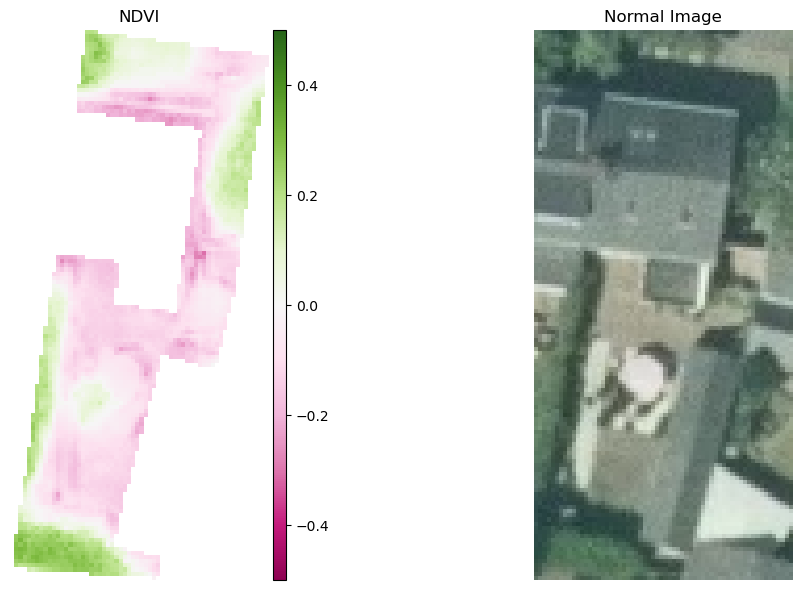

NL.IMKAD.KadastraalObject.6950590770000


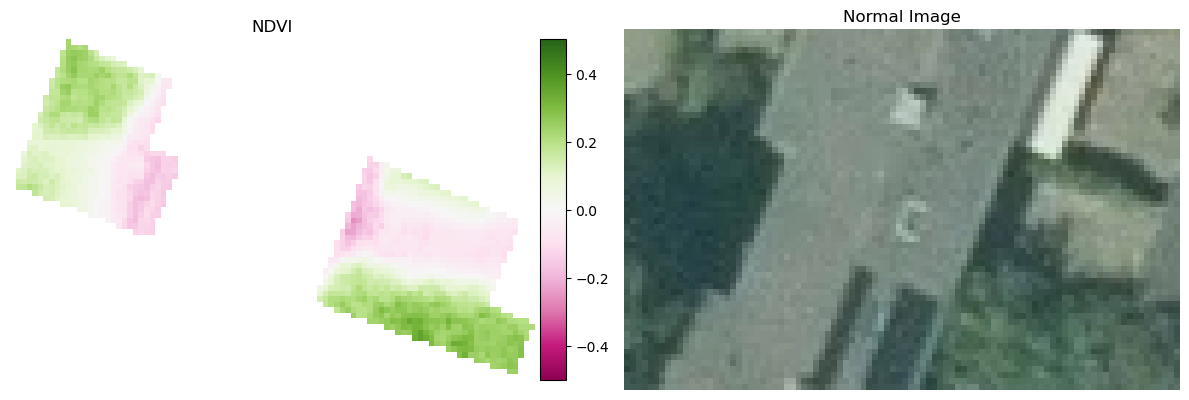

NL.IMKAD.KadastraalObject.6950425470000


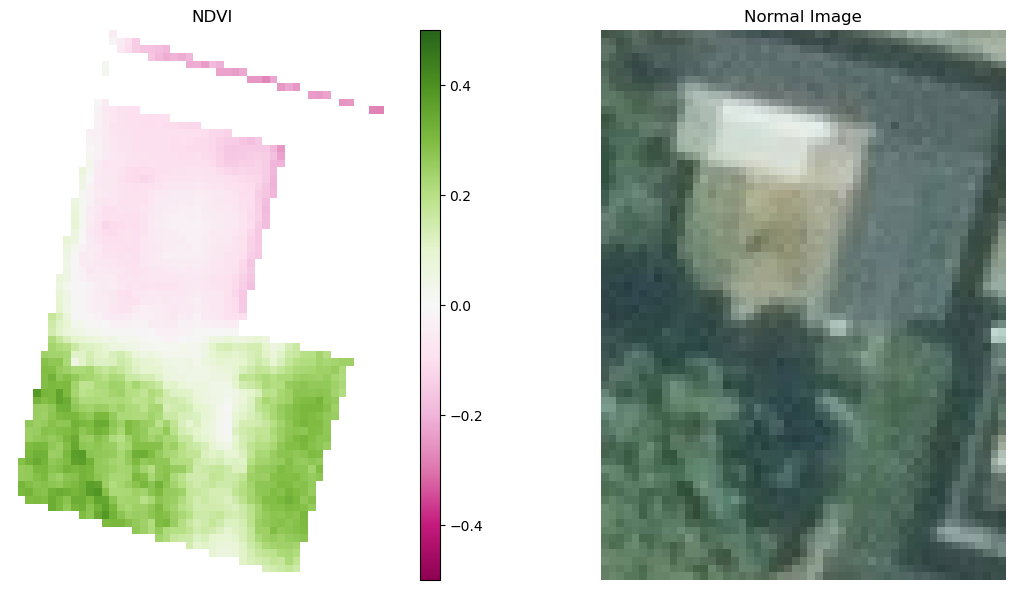

NL.IMKAD.KadastraalObject.6950589470000


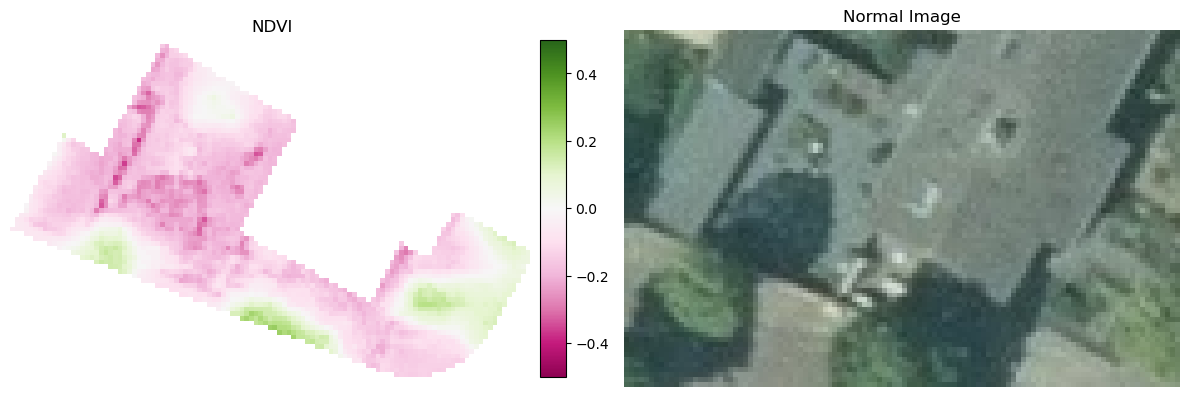

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# plot a couple of random erf's
for row in df.sample(8).iterrows():
    plot_name = row[0]
    zone_im = row[1].clipped_cir
    zone_im_rgb = row[1].clipped_rgb
    print(plot_name)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ndvi = calculate_ndvi(zone_im)

    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    im1 = axes[0].imshow(ndvi, cmap=cmap, vmin=-0.5, vmax=0.5)
    axes[0].set_title('NDVI')
    axes[0].axis('off')
    fig.colorbar(im1, cax=cax, orientation='vertical')

    axes[1].imshow(np.transpose(zone_im_rgb[:3], axes=(1, 2, 0)))
    axes[1].set_title('Normal Image')
    axes[1].axis('off')

    axes[0].set_aspect('equal')
    axes[1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

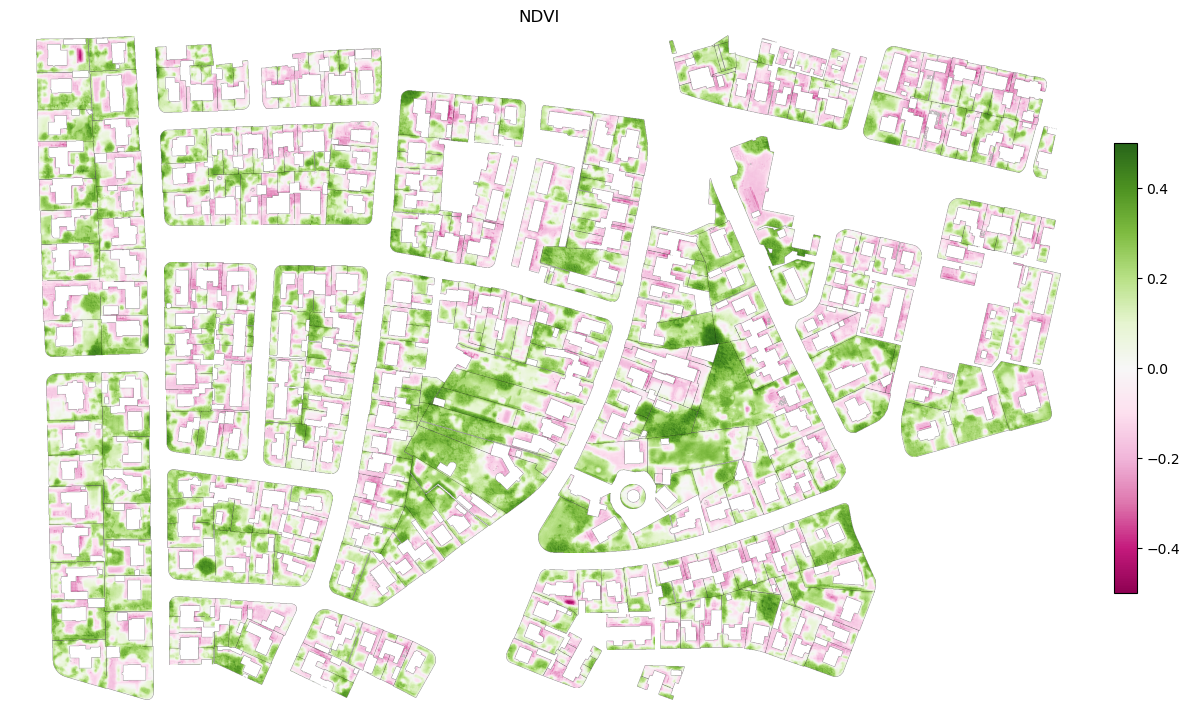

In [10]:
from rasterio.plot import show
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

norm = Normalize(vmin=-0.5, vmax=0.5)  # Set the same vmin and vmax as in the plot
fig, ax = plt.subplots(figsize=(12, 12))

for row in df.iterrows():
    plot_name = row[0]
    clipped_cir = row[1].clipped_cir
    clipped_rgb = row[1].clipped_rgb
    transform = row[1].affine_transform
    ndvi = row[1].ndvi
    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Plot the CIR raster
    show(
        ndvi,
        transform=transform,
        ax=ax,
        title="Combined Plot of Clipped Zones",
        cmap=cmap,  # Use a color map
        vmin=-0.5,
        vmax=0.5,
    )

# Set labels and titles
plt.xlabel("Longitude")
sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
plt.xlim(bounds[0], bounds[2])
plt.ylim(bounds[1], bounds[3])
plt.ylabel("Latitude")
plt.title("NDVI")
plt.axis("off")
plt.tight_layout()
plt.show()

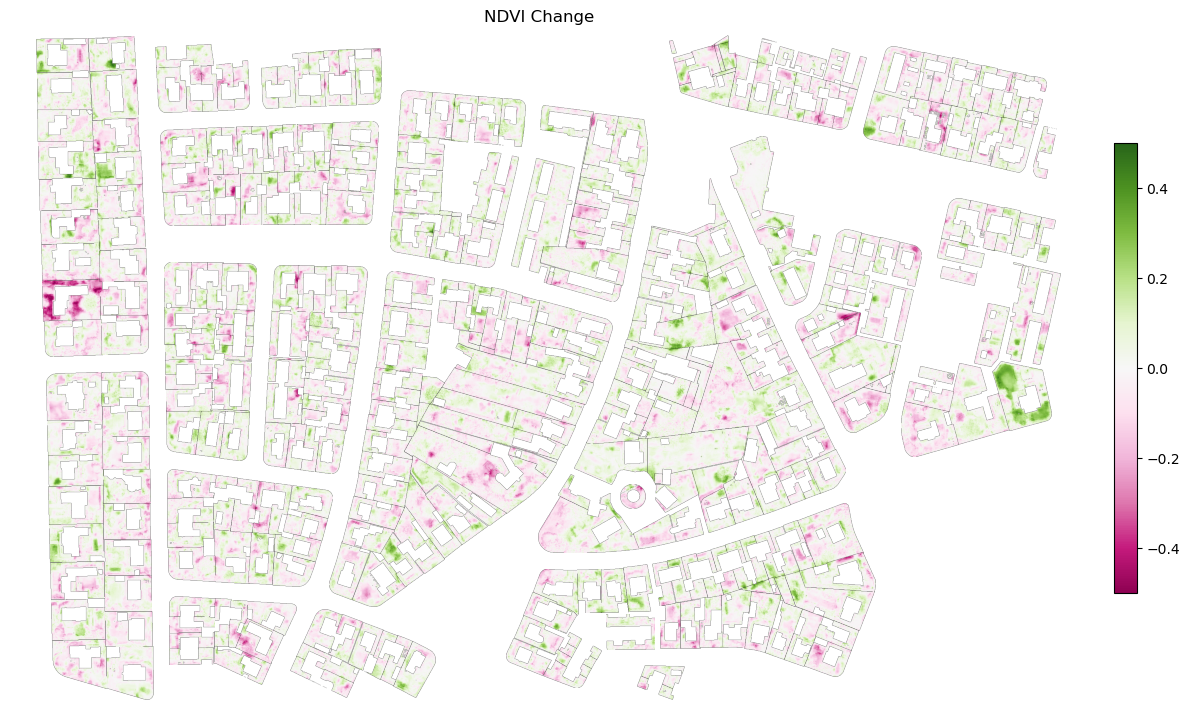

In [11]:
# plot difference

fig, ax = plt.subplots(figsize=(12, 12))

df1 = result_dataset[1]
df2 = result_dataset[-1]

for row in df1.iterrows():
    plot_name = row[0]
    clipped_cir = row[1].clipped_cir
    clipped_rgb = row[1].clipped_rgb
    transform = row[1].affine_transform
    ndvi1 = row[1].ndvi
    ndvi2 = df2.loc[plot_name]['ndvi']
    ndvi = ndvi2 - ndvi1
    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Plot the CIR raster
    show(
        ndvi,
        transform=transform,
        ax=ax,
        title="Combined Plot of Clipped Zones",
        cmap=cmap,  # Use a color map
        vmin=-0.5,
        vmax=0.5,
    )

# Set labels and titles
plt.xlabel("Longitude")
sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
plt.xlim(bounds[0], bounds[2])
plt.ylim(bounds[1], bounds[3])
plt.ylabel("Latitude")
plt.title("NDVI Change")
plt.axis("off")
plt.tight_layout()
plt.show()